In [11]:
import pandas as pd
import numpy as np
#import tensorflow
# from tensorflow.compat.v1 import InteractiveSession
# config = tensorflow.compat.v1.ConfigProto() 
# config.gpu_options.allow_growth = True
# config.log_device_placement = True
# sess = tensorflow.compat.v1.Session(config=config)
# from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPool1D, GlobalMaxPool1D, Embedding, Activation
# from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Datasets\NLP_text_mining\preprocessed_text_toxic.csv")

df.text = df.text.replace("\d*","",regex = True)

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm") #per l'italiano
def map_nlp(x):
    x = nlp(x)
    return x

df["nlp_string"] = df["string_stop"].apply(nlp)

def pos(x):
    x = [token.pos_ for token in x]
    return x
def ner(x):
    x = [token.label_ for token in x.ents]
    return x
import ast
def union_list(x):
    x = ast.literal_eval(x)
    return ' '.join(x)

KeyError: 'string_stop'

In [ ]:
df["string_stop"] = df.Nlp_text_nostopw.apply(union_list)

df["less_pos"] = df["nlp_string"].apply(pos)
df["less_ner"] = df["nlp_string"].apply(ner)
df = df[df.less_pos.astype(str) != "[]"]

In [4]:
df = pd.read_csv(r"D:\Datasets\NLP_text_mining\preprocessed_text_toxic2.csv")

In [5]:
df.text.iloc[0]

'explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since I am retired now '

In [12]:
tokenizer = Tokenizer(nb_words=100000)
tokenizer.fit_on_texts(df['text'].astype(str))
sequences = tokenizer.texts_to_sequences(df['text'].astype(str))

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=100)

labels = to_categorical(np.asarray(df.toxic))

C:\Users\loren\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras_preprocessing\text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 184883 unique tokens.


In [13]:
# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(0.20 * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [14]:
# load the whole embedding into memory
embeddings_index = dict()
f = open("D:/Datasets/embeddings/glove.6B.200d.txt", encoding="utf8")
lista = []
for line in f:
    values = line.split()
    word = values[0]
    lista.append(word)
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [15]:
embedding_matrix = np.zeros((len(word_index) + 1, 200))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# Visualizzazione embeddings

In [21]:
import scipy
from scipy.spatial.distance import euclidean
def find_closest_embeddings(embedding):
    return sorted(embeddings_index.keys(), key=lambda word: euclidean(embeddings_index[word], embedding))

In [22]:
find_closest_embeddings(embeddings_index["hate"])[:5]

['hate', 'hatred', 'anyone', 'ought', 'afraid']

In [23]:
toxic_word = df[df["toxic"]==0]

In [24]:
# from collections import Counter
# Counter(" ".join(toxic_word["string_stop"]).split()).most_common(100)

[('article', 71967),
 ('page', 54198),
 ('wikipedia', 42518),
 ('talk', 37669),
 ('edit', 33546),
 ('like', 24826),
 ('think', 23379),
 ('thank', 22870),
 ('source', 22766),
 ('know', 21287),
 ('add', 18896),
 ('time', 17281),
 ('use', 17113),
 ('people', 16935),
 ('good', 16641),
 ('user', 16015),
 ('need', 14861),
 ('link', 14505),
 ('image', 14398),
 ('say', 14248),
 ('block', 14124),
 ('delete', 13974),
 ('find', 13902),
 ('want', 13766),
 ('remove', 13706),
 ('look', 13154),
 ('work', 13031),
 ('help', 11978),
 ('comment', 11783),
 ('list', 11744),
 ('information', 11722),
 ('change', 11688),
 ('deletion', 11563),
 ('question', 11383),
 ('way', 11374),
 ('section', 11300),
 ('editor', 11212),
 ('point', 11106),
 ('write', 10813),
 ('wp', 10620),
 ('try', 10617),
 ('go', 10608),
 ('new', 10393),
 ('thing', 10244),
 ('fact', 10114),
 ('discussion', 9889),
 ('read', 9739),
 ('reference', 9596),
 ('ask', 9201),
 ('place', 9175),
 ('revert', 9106),
 ('include', 8670),
 ('right', 8630),

Prendiamo 5 termini con una frequenza alta per commenti toxic sono: 
- fuck, suck, hate, shit, faggot

Prendiamo 5 termini con una frequenza alta per per commenti non toxic sono: 
- like, think, thank, need, talk

In [25]:
lista_1 = ["fuck","suck","hate","shit","faggot"]
lista_2 = ["good", "think","thank","need","talk"]
lista_totale = ["fuck","suck","hate","shit","faggot","good", "think","thank","need","talk"]
lista_toxic = []
lista_non_toxic = []

for i in lista_1:
    lista_toxic.append(embeddings_index[i])
    
for j in lista_2:
    lista_non_toxic.append(embeddings_index[j])
    
lista_toxic = np.array(lista_toxic)
lista_non_toxic = np.array(lista_non_toxic)

In [26]:
vectors = [embeddings_index[word] for word in lista_totale]

In [34]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=2, n_iter=2000)
Y = tsne.fit_transform(vectors)

In [35]:
tsne_word_embedding = pd.DataFrame(Y)
tsne_word_embedding["Label"] = ["toxic","toxic","toxic","toxic","toxic","Not-toxic",
                               "Not-toxic","Not-toxic","Not-toxic","Not-toxic"]

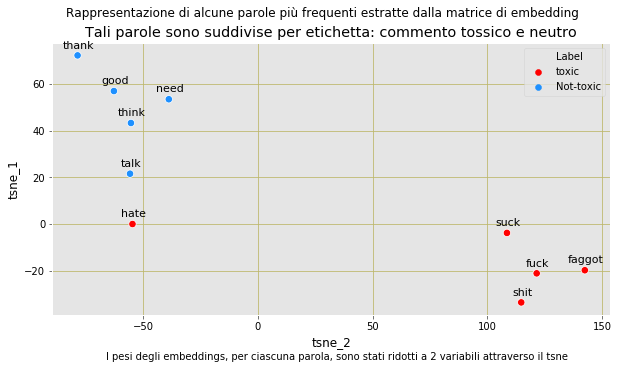

In [49]:
import matplotlib.cm as cm
import seaborn as sns
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('ggplot')
plt.figure(figsize = (10,5),edgecolor = "black")
sns.scatterplot(Y[:, 0], Y[:, 1], hue = tsne_word_embedding["Label"], s = 55,palette=['red',"dodgerblue"])
for label, x, y in zip(lista_totale, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(1, 5), textcoords="offset points",alpha=1, size = 11, 
                ha='center',va='bottom')
plt.xticks(color ="black")
plt.yticks(color ="black")
plt.ylabel("tsne_1").set_color("black")
plt.xlabel("tsne_2").set_color("black")
plt.grid(True, color = "darkkhaki")
plt.suptitle("Rappresentazione di alcune parole più frequenti estratte dalla matrice di embedding")
plt.title("Tali parole sono suddivise per etichetta: commento tossico e neutro")
plt.figtext(.2, .0,"I pesi degli embeddings, per ciascuna parola, sono stati ridotti a 2 variabili attraverso il tsne")
plt.savefig(r"D:\Datasets\NLP_text_mining\plot_embeddings.png", transparent = False)

# Modello solo con CNN

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
import tensorflow.keras as ks
from tensorflow.keras.optimizers import SGD
opt = ks.optimizers.Nadam(lr=0.0005, beta_1=0.9, beta_2=0.99)

In [16]:
from sklearn.utils import class_weight
sample_weights = class_weight.compute_sample_weight('balanced', y_train)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import Constant
keras_model = Sequential()
embedding_layer = Embedding(len(word_index)+1, 200,weights=[embedding_matrix],
                           input_length=100, trainable = False)
keras_model.add(embedding_layer)
keras_model.add(Conv1D(50, 32, activation='relu', padding='same', strides=1,kernel_initializer='glorot_normal'))
keras_model.add(MaxPool1D())
keras_model.add(Conv1D(50, 16, activation='relu', padding='same', strides=1,kernel_initializer='glorot_normal'))
keras_model.add(MaxPool1D(pool_size=1))
keras_model.add(Dropout(0.8156466614325539))
keras_model.add(Conv1D(16, 8, activation='relu', padding='same', strides=1,kernel_initializer='glorot_normal'))
keras_model.add(MaxPool1D(pool_size=2))
keras_model.add(Flatten())
keras_model.add(Dense(1024, activation = "relu",kernel_regularizer = l1_l2(l1=0.01, l2=0.01)))
keras_model.add(Dense(512, activation = "relu",kernel_regularizer = l1_l2(l1=0.01, l2=0.01))) #kernel_regularizer = l1_l2(l1=0.1, l2=0.01)
keras_model.add(Dropout(0.6680674718307945))
keras_model.add(Dense(2, activation = "softmax"))
keras_model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer=opt)

In [68]:
keras_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 200)          36976800  
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 100, 50)           320050    
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 50, 50)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 50, 50)            40050     
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 50, 50)            0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 50, 50)            0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 50, 16)           

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_img_pro = ImageDataGenerator()

In [70]:
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_img_pro = ImageDataGenerator()
def balanced_flow_from_directory(flow_from_directory):
    for immagini, classi in flow_from_directory:
         yield custom_balance(immagini.reshape(immagini.shape[0],immagini.shape[1]),classi)
            
def custom_balance(X, y):
    rus = RandomUnderSampler()
    X_resampled, y_resampled = rus.fit_sample(X, y.argmax(axis = -1))     
    #X_resampled, y_resampled = shuffle(X_resampled, y_resampled)
    #y_resampled = y_resampled.reshape(y_resampled.shape[0], 1, 1, 1) #da mettere se uso model_conv()
    y_resampled = to_categorical(y_resampled)#da mettere se uso model_flat()
    return(X_resampled, y_resampled)
train_generator_flow = train_img_pro.flow((x_train.reshape(x_train.shape[0],x_train.shape[1],1,1), y_train), 
                    batch_size=10000,
                    shuffle=True #riordino i dati in maniera casuale
                    )   
train_generator_bal = balanced_flow_from_directory(train_generator_flow)

In [71]:
keras_model.fit_generator(generator=train_generator_bal,epochs=20, verbose= 1,steps_per_epoch = 200) #class_weight=sample_weights

Epoch 1/20
200/200 [==============================] - 247s 1s/step - loss: 34.4552 - acc: 0.8396
Epoch 2/20
200/200 [==============================] - 111s 555ms/step - loss: 0.6909 - acc: 0.9104
Epoch 3/20
200/200 [==============================] - 91s 455ms/step - loss: 0.6046 - acc: 0.9483
Epoch 4/20
200/200 [==============================] - 62s 312ms/step - loss: 0.5485 - acc: 0.9727
Epoch 5/20
200/200 [==============================] - 68s 340ms/step - loss: 0.5387 - acc: 0.9768
Epoch 6/20
200/200 [==============================] - 68s 340ms/step - loss: 0.5284 - acc: 0.9793
Epoch 7/20
200/200 [==============================] - 57s 283ms/step - loss: 0.5096 - acc: 0.9867
Epoch 8/20
200/200 [==============================] - 55s 275ms/step - loss: 0.4911 - acc: 0.9897
Epoch 9/20
200/200 [==============================] - 56s 280ms/step - loss: 0.6993 - acc: 0.8773
Epoch 10/20
200/200 [==============================] - 55s 277ms/step - loss: 0.5319 - acc: 0.9752
Epoch 11/20
200/200

In [72]:
pred = keras_model.predict(x_val)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_val.argmax(axis=-1), pred.argmax(axis = -1)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     28758
           1       0.78      0.69      0.73      3121

    accuracy                           0.95     31879
   macro avg       0.87      0.83      0.85     31879
weighted avg       0.95      0.95      0.95     31879



In [25]:
from tensorflow.keras.layers import LSTM

In [ ]:
len(word_index)+1

# Modello CNN + LSTM

In [ ]:
keras_model = Sequential()
embedding_layer = Embedding(len(word_index)+1, 200,weights=[embedding_matrix],
                           input_length=100, trainable = False)
keras_model.add(embedding_layer)
keras_model.add(Conv1D(50, 32, activation='relu', padding='same', strides=1,kernel_initializer='glorot_normal'))
keras_model.add(MaxPool1D())
keras_model.add(Conv1D(50, 16, activation='relu', padding='same', strides=1,kernel_initializer='glorot_normal'))
keras_model.add(MaxPool1D(pool_size=1))
keras_model.add(Dropout(0.6))
keras_model.add(Conv1D(16, 8, activation='relu', padding='same', strides=1,kernel_initializer='glorot_normal'))
keras_model.add(MaxPool1D(pool_size=4))
#keras_model.add(Flatten())
keras_model.add(LSTM(70,kernel_regularizer = l1_l2(l1=0.1, l2=0.01)))
# keras_model.add(Dense(64, activation = "relu",kernel_regularizer = l1_l2(l1=0.1, l2=0.01)))
# keras_model.add(Dense(32, activation = "relu",kernel_regularizer = l1_l2(l1=0.1, l2=0.01))) #kernel_regularizer = l1_l2(l1=0.1, l2=0.01)
keras_model.add(Dropout(0.5))
keras_model.add(Dense(2, activation = "softmax"))
keras_model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer=opt)

In [ ]:
keras_model.summary()

In [ ]:
keras_model.fit_generator(generator=train_generator_bal,epochs=70, verbose= 1,steps_per_epoch = 200)#,class_weight=sample_weights)

In [ ]:
pred = keras_model.predict(x_val)
print(classification_report(y_val.argmax(axis=-1), pred.argmax(axis = -1)))

## Multi-input Embedding + Pos

In [ ]:
df = df[df.less_pos.astype(str) != "[]"]

In [ ]:
import ast
def union_list(x):
    x = ast.literal_eval(x)
    return ' '.join(x)

In [ ]:
df["string_stop"] = df.Nlp_text_nostopw.apply(union_list)

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm") #per l'italiano
def map_nlp(x):
    x = nlp(x)
    return x

In [ ]:
df["nlp_string"] = df["string_stop"].apply(nlp)

In [ ]:
def pos(x):
    x = [token.pos_ for token in x]
    return x
def ner(x):
    x = [token.label_ for token in x.ents]
    return x

In [ ]:
df["less_pos"] = df["nlp_string"].apply(pos)
df["less_ner"] = df["nlp_string"].apply(ner)

In [ ]:
# df.to_csv(r"D:\Datasets\NLP_text_mining\preprocessed_text_toxic2.csv")

In [ ]:
new_features = pd.get_dummies(df.less_pos.apply(pd.Series).stack()).sum(level=0)

In [ ]:
input_feat = pd.get_dummies(df.less_pos.apply(pd.Series).stack())

In [ ]:
df.index
new_features.index
for i in range(len(new_features.index)):
    if new_features.index[i] != df.index[i]:
        lista.append(df.index[i])

In [ ]:
tox = df[["toxic"]].reset_index()

In [ ]:
new_features = new_features.reset_index()

In [ ]:
new_features = pd.merge(new_features, tox, left_on = "index", right_on = "index")

In [ ]:
new_features.drop("index", axis = 1,inplace = True)

In [ ]:
["ADJ","ADP","ADV","AUX","CCONJ","DET","INTJ","NOUN","NUM","PART","PRON","PROPN","PUNCT","SCONJ","SYM","VERB","X","toxic"]

In [ ]:
new_features = pd.melt(new_features, id_vars = ["toxic"])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
new_features

In [ ]:
plot_feat = new_features[new_features["value"] != 0]
plot_feat = plot_feat.groupby(["variable","toxic"])[["value"]].sum().reset_index()

In [ ]:
plot_feat["log_value"] = np.log(plot_feat["value"])

In [ ]:
plot_feat.groupby("toxic")["value"].sum()

In [ ]:
percentage = []
for index, row in plot_feat.iterrows():
    if (row['toxic'] == 0):
        percentage.append((row.value/4362136)*100)
    else:
        percentage.append((row.value/378159)*100)

In [ ]:
plot_feat["percentage"] = percentage

In [ ]:
len(np.arange(start = 0,stop = 17,step = 17/34))

In [ ]:
plot_feat["lista_num"] = np.arange(start = 0,stop = 17,step = 17/34)

In [ ]:
plt.figure(figsize = (15,8))
g = sns.barplot(x = "variable",y ="percentage", data=plot_feat, hue = "toxic") 
for index, row in plot_feat.iterrows():
    g.text(row.lista_num-0.22,row.percentage+0.2, str(round(row.percentage,2)), color='black', ha="center")
plt.xlabel('Part of speech')
plt.ylabel('Valori percentuali (%) in termini relativi alla classe y di appartenenza')
plt.xticks(rotation=45)
plt.title("Distribuzione POS su tutte le frasi")

# Modello multi-input

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, LSTM
from tensorflow.keras.models import Model

In [ ]:
tokenizer2 = Tokenizer(nb_words=20)
tokenizer2.fit_on_texts(df['less_pos'].astype(str))
sequences_pos = tokenizer2.texts_to_sequences(df['less_pos'].astype(str))

In [ ]:
len(max(sequences_pos, key = len))

In [ ]:
len(min(sequences_pos, key = len))

In [ ]:
lengths = [len(i) for i in sequences_pos]

In [ ]:
data_pos = pad_sequences(sequences_pos, maxlen=100)

In [ ]:
data_pos = data_pos[indices]
# labels = labels[indices]
x_train_pos = data_pos[:-nb_validation_samples]
# y_train = labels[:-nb_validation_samples]
x_val_pos = data_pos[-nb_validation_samples:]
# y_val = labels[-nb_validation_samples:]

In [ ]:
x_train_pos[100]

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling1D, Dropout, LSTM
input_pos =Input(shape=(100,1), name = "Input_pos")
input_embed = Input(shape = (100), name = "Input_embedding")

embedding_layer = Embedding(len(word_index)+1, 200,weights=[embedding_matrix],
                           input_length=100, trainable = False)(input_embed)
x = Conv1D(50, 32, activation='relu', padding='same', strides=1,kernel_initializer='glorot_normal')(embedding_layer)
x = MaxPooling1D()(x)
x = Conv1D(50, 16, activation='relu', padding='same', strides=1,kernel_initializer='glorot_normal')(x)
x = MaxPooling1D(pool_size = 1)(x)
x = Dropout(0.4)(x)
x = Conv1D(16, 8, activation='relu', padding='same', strides=1,kernel_initializer='glorot_normal')(x)
x = MaxPooling1D(pool_size = 4)(x)  
x = LSTM(100, kernel_regularizer=l1_l2(l1 = 0.1, l2 = 0.1))(x)
aux_output = Dropout(0.2)(x)
#x = Flatten()(x)
#aux_output = Dense(128, activation='relu')(x)
# preds = Dense(2, activation='softmax')(x)

model=LSTM(500)(input_pos)
model = Dropout(0.1)(model)
#model = Dense(64, activation = "relu")(model)
aux_output2 = Dense(64,activation = "relu")(model)

main_out = tensorflow.keras.backend.concatenate([aux_output,aux_output2])
main_out = Dense(64, activation = "relu")(main_out)
main_out = Dense(2, activation = "softmax", name = "output_totale")(main_out)

model_tot = Model(inputs = [input_embed, input_pos], outputs = main_out)
# model = Dense(64,activation = "relu")(model)
# model=Dense(2, activation = "softmax")(model)
# myModel=Model(input_model,model)

In [ ]:
model_tot.summary()

In [ ]:
model_tot.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
input_generator = np.concatenate([x_train, x_train_pos], axis = 1)
input_generator = input_generator.reshape(input_generator.shape[0], input_generator.shape[1],1,1)

from imblearn.under_sampling import RandomUnderSampler
def balanced_flow_from_directory(flow_from_directory):
    for immagini, classi in flow_from_directory:
         yield custom_balance(np.squeeze(immagini),classi)
            
def custom_balance(X, y):
    rus = RandomUnderSampler()
    X_resampled, y_resampled = rus.fit_sample(X, y.argmax(axis = -1))     
    #X_resampled, y_resampled = shuffle(X_resampled, y_resampled)
    #y_resampled = y_resampled.reshape(y_resampled.shape[0], 1, 1, 1) #da mettere se uso model_conv()
    y_resampled = to_categorical(y_resampled)#da mettere se uso model_flat()
    return([X_resampled[:,0:100],np.expand_dims(X_resampled[:,100:],-1)] , y_resampled)

train_generator_flow = train_img_pro.flow((input_generator, y_train), 
                    batch_size=256,
                    shuffle=False #riordino i dati in maniera casuale
                    )   
train_generator_bal = balanced_flow_from_directory(train_generator_flow)

In [ ]:
model_tot.fit_generator(train_generator_bal, steps_per_epoch=200, epochs=100)

In [ ]:
pred = model_tot.predict([x_val.astype("float32"), np.expand_dims(x_val_pos.astype("float32"),-1)])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val.argmax(axis = -1), pred.argmax(axis=-1)))

In [ ]:
pred.argmax(axis = -1)[:20]